<a href="https://colab.research.google.com/github/Boadzie/Jupyter-Notebooks/blob/master/Fashion_Image_Classification_with_Keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Business Problem

**Classify Fashion Image**

#### Overview
**The dataset is provided by Keras—the fashion items dataset. This dataset also has 28×28 grayscale training and test images like MNIST.**

## Preprocessing

In [0]:
# import keras library
from tensorflow import keras

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


# setting styles
from matplotlib import style
style.use("ggplot")

In [0]:
# load the mnist dataset provided by Keras
dataset = keras.datasets.fashion_mnist

In [0]:
# labels for the images
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [0]:
# load the training and test data
(img_rows, img_cols) = (28,28)

(x_train, y_train),(x_test, y_test) = dataset.load_data()

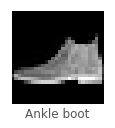

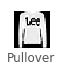

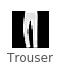

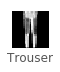

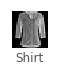

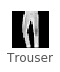

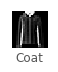

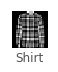

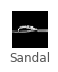

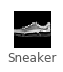

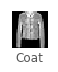

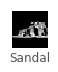

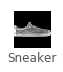

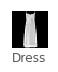

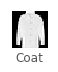

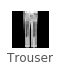

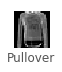

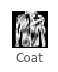

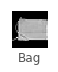

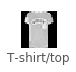

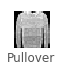

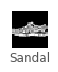

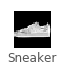

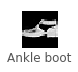

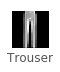

In [0]:
# lets plot some data samples
plt.figure(figsize=(10,10))
for i in range(25):
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(x_test[i], cmap=plt.cm.gray)
  plt.xlabel(class_names[y_test[i]])
  plt.show()

## Building the CNN

In [0]:
from keras.utils import to_categorical
# one hot encode the results
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)


Using TensorFlow backend.


In [0]:
# normalize the data to values between 0 and 1
x_train, x_test = x_train / 255.0, x_test / 255.0


In [0]:
# customize data for CNN - make a 3D array
x_train_cnn = np.expand_dims(x_train, -1)
x_test_cnn = np.expand_dims(x_test, -1)

In [0]:
# Building the Architecture
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Input
from keras.layers import Conv2D, MaxPooling2D


model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu',
input_shape=(28, 28, 1), padding='same'))
model.add(MaxPooling2D(pool_size=(4, 4)))
model.add(Flatten())
model.add(Dense(10, activation='softmax'))

In [0]:
# assign the optimizer for the model and define loss function
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [0]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 7, 7, 32)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 1568)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 10)                15690     
Total params: 16,010
Trainable params: 16,010
Non-trainable params: 0
_________________________________________________________________


In [0]:
# run the actual training
history = model.fit(x_train_cnn, y_train, epochs=1)

Instructions for updating:
Use tf.cast instead.
Epoch 1/1
60000/60000 [==============================] - 37s 624us/step - loss: 0.5259 - acc: 0.8130


In [0]:
# evaluate on test data
model.evaluate(x_test_cnn, y_test)

10000/10000 [==============================] - 2s 235us/step


[0.401449560713768, 0.8593]

In [0]:
# Training with 20 epochs
# run the actual training
history = model.fit(x_train_cnn, y_train, epochs=20)

Epoch 1/20
60000/60000 [==============================] - 37s 618us/step - loss: 0.3623 - acc: 0.8722
Epoch 2/20
60000/60000 [==============================] - 37s 623us/step - loss: 0.3256 - acc: 0.8853
Epoch 3/20
60000/60000 [==============================] - 38s 625us/step - loss: 0.3054 - acc: 0.8918
Epoch 4/20
60000/60000 [==============================] - 37s 623us/step - loss: 0.2888 - acc: 0.8978
Epoch 5/20
60000/60000 [==============================] - 37s 617us/step - loss: 0.2782 - acc: 0.9014
Epoch 6/20
60000/60000 [==============================] - 37s 616us/step - loss: 0.2677 - acc: 0.9056
Epoch 7/20
60000/60000 [==============================] - 37s 619us/step - loss: 0.2595 - acc: 0.9078
Epoch 8/20
60000/60000 [==============================] - 37s 623us/step - loss: 0.2527 - acc: 0.9102
Epoch 9/20
60000/60000 [==============================] - 37s 620us/step - loss: 0.2459 - acc: 0.9124
Epoch 10/20
60000/60000 [==============================] - 37s 615us/step - loss: 

In [0]:
# evaluate on test data
model.evaluate(x_test_cnn, y_test)

10000/10000 [==============================] - 2s 198us/step


[0.2722225585699081, 0.9034]

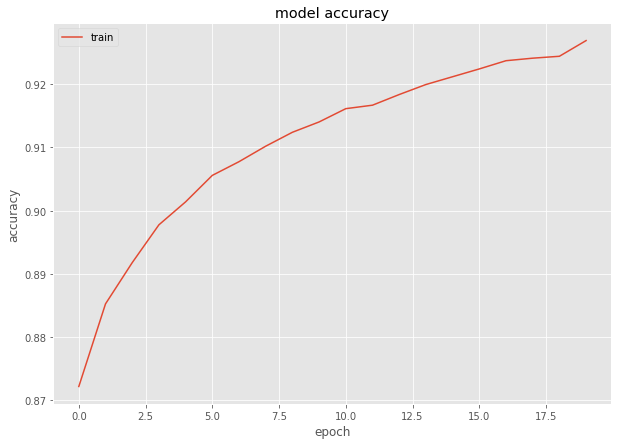

In [0]:
# Plotting the Learning History
import matplotlib.pyplot as plt
%matplotlib inline

# summarize history for accuracy
fig= plt.figure(figsize=(10, 7))
plt.plot(history.history['acc'])

#plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


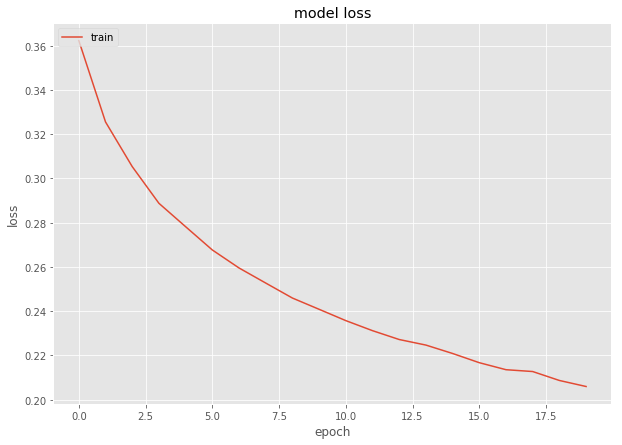

In [0]:
# summarize history for loss
fig= plt.figure(figsize=(10, 7))
plt.plot(history.history['loss'])

#plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [0]:
# Saving the model